In [1]:
import tweepy
import pandas as pd     
import numpy as np      
import csv
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
consumer_key='kf3O9x33N1TNObXEALc6wINR8'
consumer_secret='c7mUXA6jkMnyPHoYYA0A0twpUnMqonuRxv3RllG7AYFyEUUnVZ'
access_token='1090112330350903297-ORfvaEjgsOW8qnER13lIeJ4TYEysQH' 
access_token_secret='i3LhavIrJh2YtLq3dLUOlSgD93g7qR2DleudhPNP0eHhc'

In [3]:
def twitter_setup():
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)
    return api

In [4]:
extractor = twitter_setup()
tweets = extractor.user_timeline(id=2183816041, count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

आप सभी को महाशिवरात्रि की हार्दिक शुभकामनाएं। #MahaShivRatri greetings to everyone. https://t.co/VShrKCjH5h

Sharing my interaction at the India Today Conclave 2019, March 2, 2019   https://t.co/wSOGSP3Btf

The Opposition is entitled to oppose and ask questions, but then restrain and statesmanship are also an essential i… https://t.co/dJbSelA607

In his speech Dr Singh implicitly doubted India’s right to defend its sovereignty from those who want to damage it… https://t.co/f12oNDaP7r

The most disappointing &amp; objectionable statement was of the former Prime Minister Dr. Manmohan Singh. He stated tha… https://t.co/63DYo9GAos



In [5]:
extractor.get_user(id=2183816041).name

'Arun Jaitley'

In [6]:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
display(data.head(10))

,Tweets
0,आप सभी को महाशिवरात्रि की हार्दिक शुभकामनाएं। ...
1,Sharing my interaction at the India Today Conc...
2,The Opposition is entitled to oppose and ask q...
3,In his speech Dr Singh implicitly doubted Indi...
4,The most disappointing &amp; objectionable sta...
5,The West Bengal Chief Minister went a step fur...
6,The resolution passed by 21 Opposition Parties...
7,These statements made by opposition parties hu...
8,After IAF's counter terror operation in Balako...
9,India’s Opposition Has A Lot To Learn https:...


In [7]:
print(dir(tweets[1]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [8]:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [9]:
display(data.head(100))

,Tweets,len,ID,Date,Source,Likes,RTs
0,आप सभी को महाशिवरात्रि की हार्दिक शुभकामनाएं। ...,107,1102384202794844160,2019-03-04 01:44:09,Twitter for iPhone,5165,597
1,Sharing my interaction at the India Today Conc...,96,1102168634691076096,2019-03-03 11:27:34,Twitter for iPhone,899,227
2,The Opposition is entitled to oppose and ask q...,140,1102155313963286528,2019-03-03 10:34:38,Twitter for iPhone,3471,1129
3,In his speech Dr Singh implicitly doubted Indi...,139,1102155220036005890,2019-03-03 10:34:16,Twitter for iPhone,4477,1498
4,The most disappointing &amp; objectionable sta...,144,1102154609731256327,2019-03-03 10:31:50,Twitter for iPhone,13271,5065
5,The West Bengal Chief Minister went a step fur...,140,1102154506584932352,2019-03-03 10:31:26,Twitter for iPhone,15630,4449
6,The resolution passed by 21 Opposition Parties...,139,1102154413521756161,2019-03-03 10:31:03,Twitter for iPhone,4263,1528
7,These statements made by opposition parties hu...,140,1102154211557605377,2019-03-03 10:30:15,Twitter for iPhone,3801,1210
8,After IAF's counter terror operation in Balako...,140,1102154099032842242,2019-03-03 10:29:48,Twitter for iPhone,3754,1194
9,India’s Opposition Has A Lot To Learn https:...,63,1102152919225389056,2019-03-03 10:25:07,Twitter for iPhone,3003,1002


In [10]:
fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
India has withdrawn MFN status to Pakistan after the Pulwama incident. Upon withdrawal, basic customs duty on all g… https://t.co/NsuM64ufkb
Number of likes: 52611
140 characters.

The tweet with more retweets is: 
India has withdrawn MFN status to Pakistan after the Pulwama incident. Upon withdrawal, basic customs duty on all g… https://t.co/NsuM64ufkb
Number of retweets: 15508
140 characters.



In [22]:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

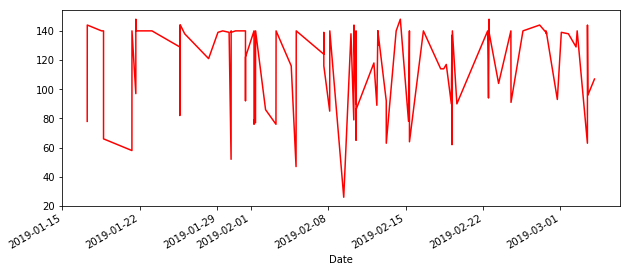

In [12]:
tlen.plot(figsize=(10,4), color='r')

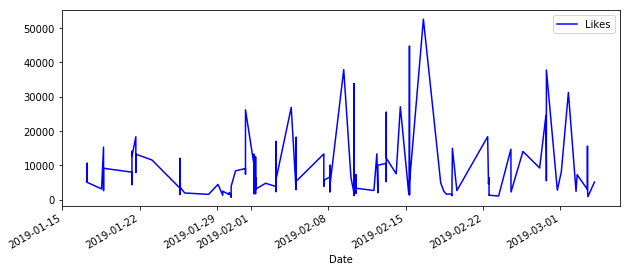

In [13]:
tfav.plot(figsize=(10,4),color='b',label="Likes", legend=True)

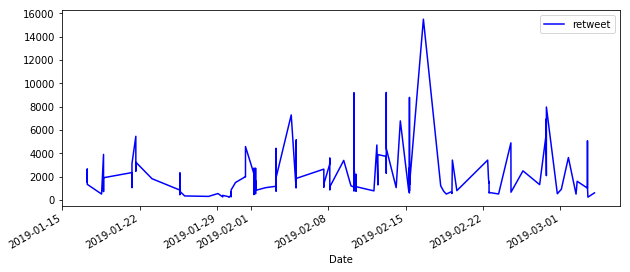

In [14]:
tret.plot(figsize=(10,4),color='b',label="retweet", legend=True)

In [15]:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone


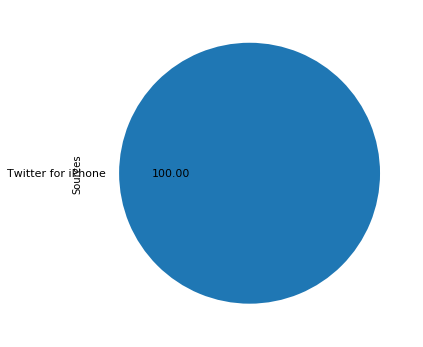

In [16]:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6))

In [17]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [18]:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])
display(data.head(100))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,आप सभी को महाशिवरात्रि की हार्दिक शुभकामनाएं। ...,107,1102384202794844160,2019-03-04 01:44:09,Twitter for iPhone,5165,597,0
1,Sharing my interaction at the India Today Conc...,96,1102168634691076096,2019-03-03 11:27:34,Twitter for iPhone,899,227,0
2,The Opposition is entitled to oppose and ask q...,140,1102155313963286528,2019-03-03 10:34:38,Twitter for iPhone,3471,1129,0
3,In his speech Dr Singh implicitly doubted Indi...,139,1102155220036005890,2019-03-03 10:34:16,Twitter for iPhone,4477,1498,1
4,The most disappointing &amp; objectionable sta...,144,1102154609731256327,2019-03-03 10:31:50,Twitter for iPhone,13271,5065,-1
5,The West Bengal Chief Minister went a step fur...,140,1102154506584932352,2019-03-03 10:31:26,Twitter for iPhone,15630,4449,0
6,The resolution passed by 21 Opposition Parties...,139,1102154413521756161,2019-03-03 10:31:03,Twitter for iPhone,4263,1528,0
7,These statements made by opposition parties hu...,140,1102154211557605377,2019-03-03 10:30:15,Twitter for iPhone,3801,1210,0
8,After IAF's counter terror operation in Balako...,140,1102154099032842242,2019-03-03 10:29:48,Twitter for iPhone,3754,1194,0
9,India’s Opposition Has A Lot To Learn https:...,63,1102152919225389056,2019-03-03 10:25:07,Twitter for iPhone,3003,1002,0


In [19]:
pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [20]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 38.0%
Percentage of neutral tweets: 50.0%
Percentage de negative tweets: 12.0%
